<a href="https://colab.research.google.com/github/sbbzplt/QiskitFallFest_IZTECH/blob/master/Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum Circuits

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute


### What are quantum circuits?
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's take a look at some of the popular quantum gates.

### X Gate
An X Gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps |0> to |1>、|1> to |0>. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

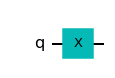

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

### Z Gate
It equates to a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

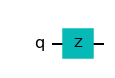

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw(output='mpl')

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis which is just middle of $X$-axis and $Z$-axis.
It maps the basis state |0> to $\frac{|0> + |1>}{\sqrt{2}}$, which means that a measurement will have equal probabilities to become 1 or 0 creating a 'superposition' of states.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

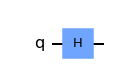

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

### CX Gate (CNOT Gate)
The controlled NOT gate (or CNOT or CX) acts on 2 qubits, and performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1>$, and otherwise leaves it unchanged.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

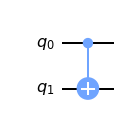

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

### CZ Gate
The CZ gate acts on two qubits (each called a 'controlled bit' and a 'target bit'). It flips the sign (equivalent to applying the phase shift Z gate) of the target qubit if and only if the control qubit is |1>.

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

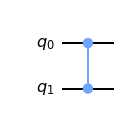

In [ ]:
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw(output='mpl')

Note: A CZ gate can also be constructed from a CX gate and H gate.

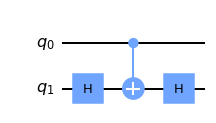

In [ ]:
qc = QuantumCircuit(2)

qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.draw(output='mpl')

### CCX Gate
The CCX gate is also called a Toffoli gate.
The CCX gate is a 3-bit gate, with two controls and one target as their input and output. When if the first two bits are in the state |1> it applies a Pauli-X (or NOT) on the third bit, else it does nothing.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{pmatrix}$

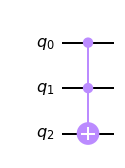

In [ ]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output='mpl')

For learning about other quantum gates, please refer to [Summary of Quantum Operations](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb) from qiskit-iqx-tutorials.

### Generalization of CCX gate to multiple qubits

Suppose we want to apply a NOT gate controlled by multiple qubits. 

There is a function called `mct` for performing this task in Qiskit. You provide the list of controls as a list.

In the function below, you see different realizations of mct with different controls

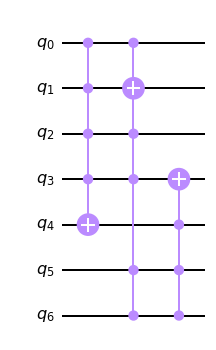

In [ ]:
qc = QuantumCircuit(7)
qc.mct([0,1,2,3],4)
qc.mct([0,2,3,5,6],1)
qc.mct([4,5,6],3)
qc.draw(output='mpl')

## Creating logical gates with quantum gates
Now let's start creating a classic logic gate using quantum gates.
Each gates and their truth tables will be shown. Here we denote quantum registers as 'q', classical registers as 'c' where we encode the output of the measurement.

### NOT Gate
As it's mentioned before, a X gate can be considered as a NOT gate. Truth table for a NOT Gate looks like this:


|input|output|
|--|--|
|0|1|
|1|0|

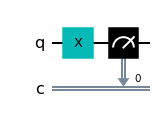

In [ ]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
qc.draw(output='mpl')

### AND Gate
Truth table for an AND Gate looks like this:

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

With a CCX gate, the result of an AND gate for 2 controlled bits will be output to its target bit.

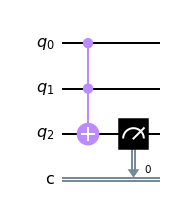

In [ ]:
qc = QuantumCircuit(3,1)
qc.ccx(0,1,2)
qc.measure(2,0)
qc.draw(output='mpl')

### NAND Gate
A NAND gate can be made by applying a NOT gate after applying an AND gate.

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

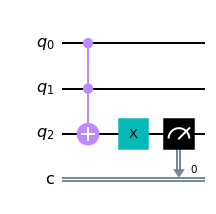

In [ ]:
qc = QuantumCircuit(3,1)
qc.ccx(0,1,2)
qc.x(2)
qc.measure(2,0)
qc.draw(output='mpl')

### OR Gate

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

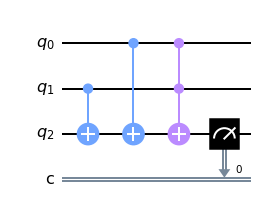

In [ ]:
qc = QuantumCircuit(3,1)

qc.cx(1,2)
qc.cx(0,2)
qc.ccx(0,1,2)
qc.measure(2,0)
qc.draw(output='mpl')

Alternatively

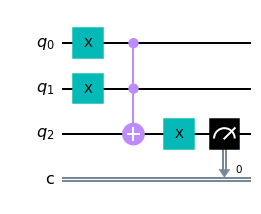

In [ ]:
qc = QuantumCircuit(3,1)

qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.x(2)
qc.measure(2,0)
qc.draw(output='mpl')

### XOR Gate
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

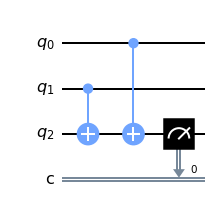

In [ ]:
qc = QuantumCircuit(3,1)
qc.cx(1,2)
qc.cx(0,2)
qc.measure(2,0)
qc.draw(output='mpl')